# Cодержанние
- [Изучение данных из файла](#Изучение-данных-из-файла)
    - [Вывод](#Вывод)
- [Приоритизация гипотез](#Приоритизация-гипотез)
    - [Фреймворк ICE для приоритизации гипотез](#Фреймворк-ICE-для-приоритизации-гипотез)
    - [Фреймворк RICE для приоритизации гипотез](#Фреймворк-RICE-для-приоритизации-гипотез)
    - [Вывод](#Вывод)
- [Анализ A/B-тест](#Анализ-A/B-тест)
    - [График кумулятивной выручки по группам](#График-кумулятивной-выручки-по-группам)
    - [График кумулятивного среднего чека по группам](#График-кумулятивного-среднего-чека-по-группам)
    - [График относительного изменения кумулятивного среднего чека](#График-относительного-изменения-кумулятивного-среднего-чека)
    - [График кумулятивной конверсии по группам](#График-кумулятивной-конверсии-по-группам)
    - [График относительного изменения кумулятивной конверсии](#График-относительного-изменения-кумулятивной-конверсии)
    - [Точечный график количества заказов по пользователям](#Точечный-график-количества-заказов-по-пользователям)
    - [Точечный график стоимостей заказов](#Точечный-график-стоимостей-заказов)
    - [Cтатистическая значимость различий в конверсии по «сырым» данным ](#Cтатистическая-значимость-различий-в-конверсии-по-«сырым»-данным )
    - [Cтатистическая значимость различий в среднем чеке заказа по «сырым» данным](#Cтатистическая-значимость-различий-в-среднем-чеке-заказа-по-«сырым»-данным)
    - [Cтатистическая значимость различий в конверсии между группами по «очищенным» данным](#Cтатистическая-значимость-различий-в-конверсии-между-группами-по-«очищенным»-данным)
    - [Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#Cтатистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным)
    - [Вывод](#Вывод)

**Цели исследования:**

1. Приоритизировать гипотезы
2. Запустить A/B-тест
3. Проанализировать результаты

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [3]:
for df,name in zip([hypothesis, orders, visitors], 
                   ['hypothesis', 'orders', 'visitors']):
    df.name = name
    # Переведем название столбцов в нижний регистр
    df.columns = df.columns.str.lower()
    print('_' * 35 + f'{df.name}' + '_' * 35)
    display(df.head())
    print('-' * 75)
    df.info()
    print('-' * 75)
    # Проверка датафрейма на дубликаты
    if df.duplicated().sum() == 0:
        print(f'В датафрейме {name} дубликатов не обнаружено')
    else:
        print(f'В датафрейме {name} обнаружено {df.duplicated().sum()} дубликатов')

___________________________________hypothesis___________________________________


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
---------------------------------------------------------------------------
В датафрейме hypothesis дубликатов не обнаружено
___________________________________orders___________________________________


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
---------------------------------------------------------------------------
В датафрейме orders дубликатов не обнаружено
___________________________________visitors___________________________________


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
---------------------------------------------------------------------------
В датафрейме visitors дубликатов не обнаружено


In [4]:
# Поменяем названия столбцов
orders = orders.rename(columns={"transactionid": "transaction_id", "visitorid": "visitor_id"})

### Вывод

При первом взгяде на данные критических ошибок не обнаружено. Можно приступать к следующим пунктам

## Приоритизация гипотез

### Фреймворк ICE для приоритизации гипотез

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


### Фреймворк RICE для приоритизации гипотез

In [6]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Вывод

Видим, приоритизации гипотез двух разных методов несколько отличаестя, это происходит из за того что в методе RICE появляется параметр Reach(скольких пользователей затронет изменение, которое вы хотите внести)

## Анализ A/B-тест

Перед началом теста нужно проверить нет ли пользователей которые по какой-то причине попали в обе группы

In [7]:
duplicated_users = orders.groupby('visitor_id').agg({'group':['nunique','unique']})
duplicated_users.columns = ['groups', 'groups_name']
duplicated_users = duplicated_users.query('groups > 1')

display(duplicated_users.head())
# Посчитаем сколько таких пользователей
print(duplicated_users['groups'].count())

,groups,groups_name
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


58


Получилось 58 пользователей что больше 5% от всей выборки. Про посетителей у нас вообще нет никакой информации кроме их визитов. Поэтому и смысла удалять их нет

### График кумулятивной выручки по группам

In [8]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [9]:
# Агрегируем значения в датафрейме orders
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
               .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
               .sort_values(by=['date','group'])
) 

In [10]:
# Агрегируем значения в датафрейме visitors
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
)

In [11]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


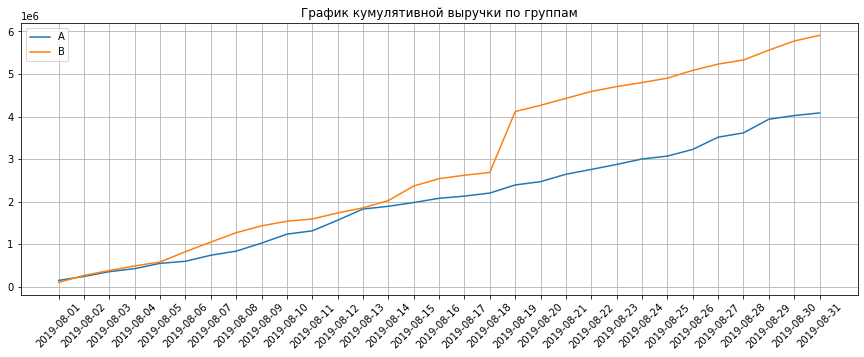

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.tick_params(axis = 'x', labelrotation = 45)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.show()

Выручка в двух группах росла на протяжении всего теста. Однако видим резкое увелечение выручки в групе В, что может говорить о увеличении числа заказов или заказах на большие суммы. Расмотрим график средних чеков

### График кумулятивного среднего чека по группам

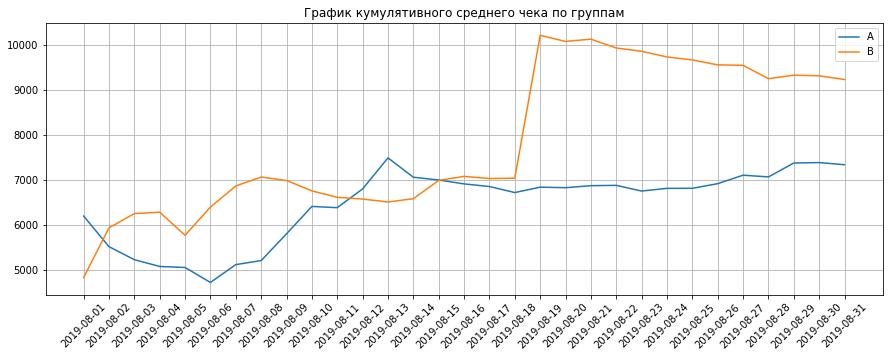

In [13]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.show()

В группе А видим что сперва средний чек уменьшился, а далее увеличился и держался стабильно до конца теста. В группе В видим резкий рост как и на графике с выручкой. Скорей всего в этот период в группе В были заказы на большую сумму. Далее мы построим график относительного различия для среднего чека

###  График относительного изменения кумулятивного среднего чека

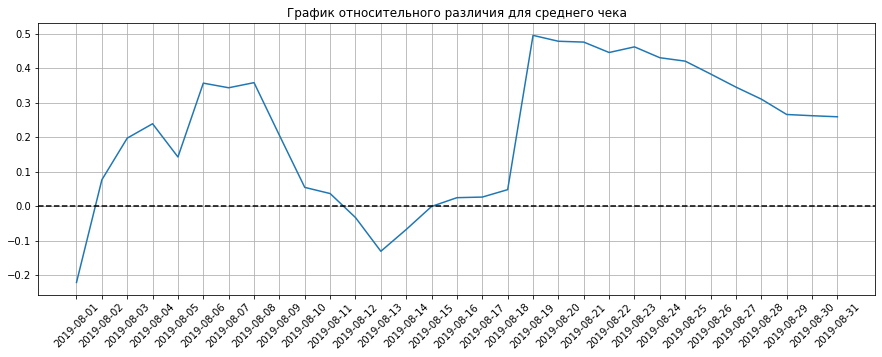

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График относительного различия для среднего чека')
plt.tick_params(axis = 'x', labelrotation = 45)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
                                          (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы.Аналогично проанализируем график кумулятивной конверсии

### График кумулятивной конверсии по группам

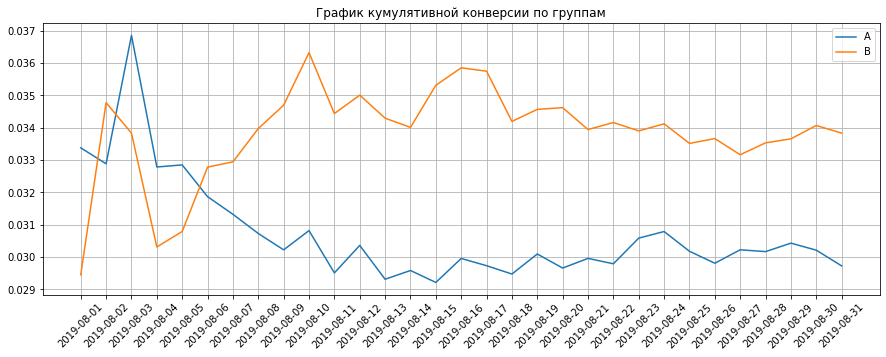

In [15]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График кумулятивной конверсии по группам')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-08-31', 0, 0.015]) 
plt.show()

Конверсия группы В резко снизилась, далее колебалась, но зафиксировалась. В группе А был резкий подъем, за тем резкий спад потом опять подъем и подконец конверсия снизилась. Далее расмотрим график относительного различия кумулятивных конверсий

### График относительного изменения кумулятивной конверсии

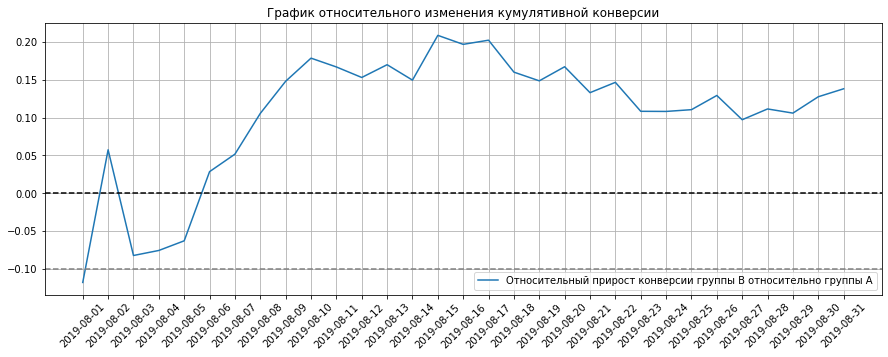

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График относительного изменения кумулятивной конверсии')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])
plt.show()

Конверсия группы В практически на протяжении всего теста была намного выше группы А

### Точечный график количества заказов по пользователям

Выявим анамальные количества заказов на пользователя

In [17]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


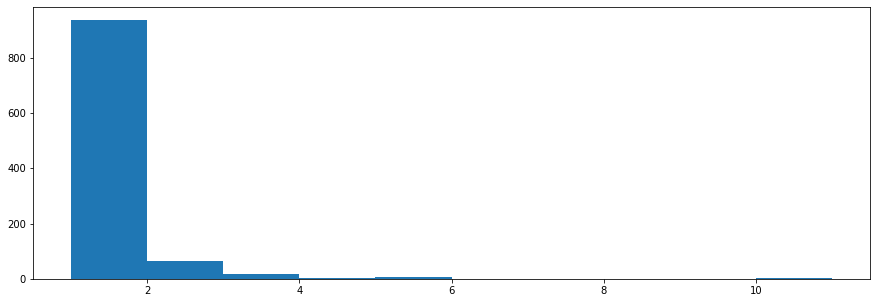

In [18]:
# Построим гистограмму
plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders'])
plt.show()

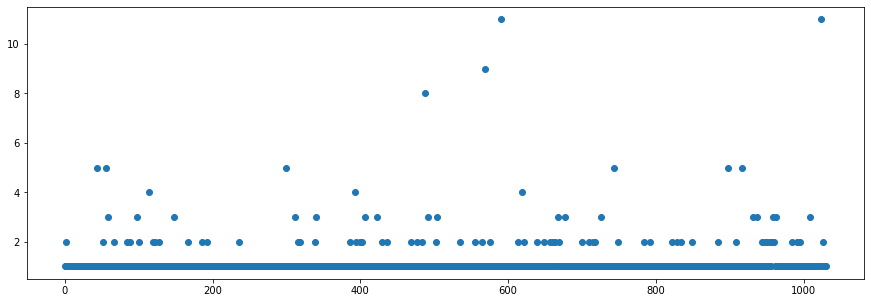

In [19]:
# Построим точечный график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Видим что чаще всего пользователи совершают 1 заказ, но доля 2-3 заказов велика 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей

In [20]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Видим что не более 5% пользователей делали больше 2 заказов не более 1% делали 4 и более заказа. Примем нижнюю границу числа заказов в 2 заказа.

### Точечный график стоимостей заказов

In [21]:
# Посмотрим на самые большие заказы 
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Один заказ на 1.294.500. Если такой дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно

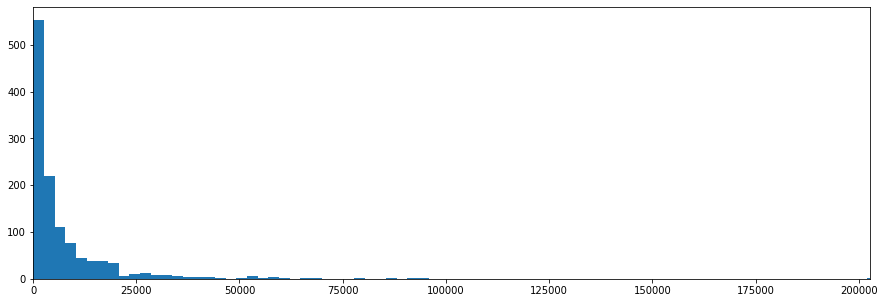

In [22]:
plt.figure(figsize=(15,5))
plt.hist(orders['revenue'], bins=500)
plt.xlim(0, 202740)
plt.show()

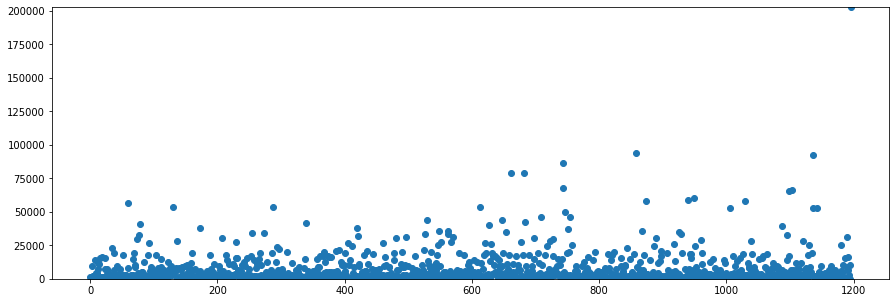

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 
# Чтобы график был информативней уберем самый крупный заказ
plt.ylim(0, 202740)
plt.show()

По графику можно выбрать границу аномальных заказов между 25 000 и 50 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями

Посчитайем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [24]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Видим что не более 5% пользователей делали на сумму 28000 и более, не более 1% делали заказа на сумму 58233 и более. Примем нижнюю границу для определения аномальных заказов в 28000.

### Cтатистическая значимость различий в конверсии по «сырым» данным 

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы.
- Нулевая: различий в конверсии между группами нет. 
- Альтернативная: различия в конверсии между группами есть

In [25]:
#Начнём с подготовки данных
#Посчитаем количесвто визитов в день в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#Посчитаем количесвто комулятивных визитов в день в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#Посчитаем количесвто визитов в день в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#Посчитаем количесвто комулятивных визитов в день в группе А
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#Посчитаем количесвто заказов и суммы в день в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#Посчитаем количесвто комулятивных заказов и комулятивной суммы в день в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#Посчитаем количесвто заказов и суммы в день в группе А
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#Посчитаем количесвто комулятивных заказов и комулятивной суммы в день в группе А
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#Объединим все в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

In [26]:
#Создадим переменные в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [27]:
sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

In [28]:
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0) 

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Первое число — p-value = 0.017 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем. Однако относительный проигрыш группы B равен 13.8% — второе число в выводе.

### Cтатистическая значимость различий в среднем чеке заказа по «сырым» данным 

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [30]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

Посмотрим как измениться P-value после очищения данных

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей:
- с числом заказов больше 2 — `usersWithManyOrders` 
- и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`.

Объединим их в таблице `abnormalUsers`.

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


74 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [33]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


Результаты по конверсии практически не изменились. Посмотрим результаты по среднему чеку

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [34]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


P-value практически не изменился, а относительная разница между группами кординально поменялась, если на "сырых" данных средний чек группы B был значительно выше среднего чека группы A, то после очищения мы видим что средний чек группы В ниже среднего чека группы А. Что говорит нам о заказах на большие суммы в гроуппе В

## Вывод

Имеющиеся факты:
- Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.